In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import requests
import time
from config import api_key
from citipy import citipy

%matplotlib inline
style.use('fivethirtyeight')

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

626

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

for n, city in enumerate(cities, start=1):
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log city being processed
    print("Record count:", n, "City:", city)
    
    # Run API request for each city
    try:
        
        # Make request
        city_weather = requests.get(city_url).json()
        
        # Retrieve data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Record count: 1 City: iqaluit
Record count: 2 City: lazaro cardenas
Record count: 3 City: butaritari
Record count: 4 City: quatre cocos
Record count: 5 City: chuy
Record count: 6 City: upernavik
Record count: 7 City: ushuaia
Record count: 8 City: rosarito
Record count: 9 City: lardos
Record count: 10 City: florianopolis
Record count: 11 City: ponta do sol
Record count: 12 City: faanui
Record count: 13 City: longyearbyen
Record count: 14 City: hilo
Record count: 15 City: tunduru
City not found. Skipping...
Record count: 16 City: mataura
Record count: 17 City: pokaran
Record count: 18 City: taolanaro
City not found. Skipping...
Record count: 19 City: grindavik
Record count: 20 City: guerrero negro
Record count: 21 City: thompson
Record count: 22 City: rikitea
Record count: 23 City: upington
Record count: 24 City: barentsburg
City not found. Skipping...
Record count: 25 City: hithadhoo
Record count: 26 City: skjervoy
Record count: 27 City: asyut
Record count: 28 City: tiksi
Record count: 

Record count: 230 City: coahuayana
Record count: 231 City: avarua
Record count: 232 City: chokurdakh
Record count: 233 City: aksu
Record count: 234 City: nantong
Record count: 235 City: ust-nera
Record count: 236 City: chunian
Record count: 237 City: rawson
Record count: 238 City: port keats
Record count: 239 City: husavik
Record count: 240 City: yining
Record count: 241 City: cabo san lucas
Record count: 242 City: rungata
City not found. Skipping...
Record count: 243 City: catia la mar
Record count: 244 City: namatanai
Record count: 245 City: viedma
Record count: 246 City: general roca
Record count: 247 City: nepa nagar
Record count: 248 City: yunjinghong
City not found. Skipping...
Record count: 249 City: arlit
Record count: 250 City: torbay
Record count: 251 City: san quintin
Record count: 252 City: innisfail
Record count: 253 City: kotelnikovo
Record count: 254 City: inirida
Record count: 255 City: tuatapere
Record count: 256 City: tual
Record count: 257 City: merauke
Record count:

Record count: 463 City: rio gallegos
Record count: 464 City: jalu
Record count: 465 City: mersing
Record count: 466 City: ambon
Record count: 467 City: eyl
Record count: 468 City: lata
Record count: 469 City: umzimvubu
City not found. Skipping...
Record count: 470 City: prince rupert
Record count: 471 City: hasaki
Record count: 472 City: acapulco
Record count: 473 City: kavieng
Record count: 474 City: sladkovo
Record count: 475 City: mapiri
Record count: 476 City: taikang
Record count: 477 City: bethalto
Record count: 478 City: touros
Record count: 479 City: vaitupu
City not found. Skipping...
Record count: 480 City: mengcheng
Record count: 481 City: bari
City not found. Skipping...
Record count: 482 City: srednekolymsk
Record count: 483 City: peruibe
Record count: 484 City: ajdabiya
Record count: 485 City: san juan
Record count: 486 City: ituni
City not found. Skipping...
Record count: 487 City: birjand
Record count: 488 City: korla
City not found. Skipping...
Record count: 489 City: 

## Pandas Analysis

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,68,CA,1533416495,70,63.75,-68.52,47.44,8.30
1,lazaro cardenas,40,MX,1533411600,26,28.39,-105.62,93.20,5.82
2,butaritari,32,KI,1533416496,100,3.07,172.79,82.18,8.75
3,quatre cocos,20,MU,1533412800,68,-20.21,57.76,71.60,6.93
4,chuy,88,UY,1533416496,95,-33.69,-53.46,55.45,13.00


In [5]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

output_data_file = "output/cities.csv"

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [6]:
# Get info on dataset
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
City          572 non-null object
Cloudiness    572 non-null int64
Country       572 non-null object
Date          572 non-null int64
Humidity      572 non-null int64
Lat           572 non-null float64
Lng           572 non-null float64
Max Temp      572 non-null float64
Wind Speed    572 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 40.3+ KB


### Latitude vs Temperature Plot

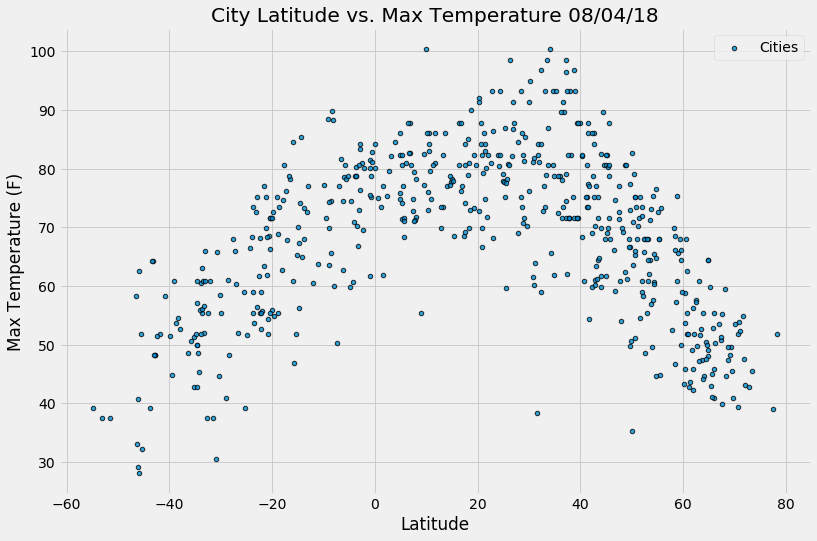

In [16]:
# Build scatter plot for latitude vs temperature
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Max Temp",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

### Latitude vs Humidity

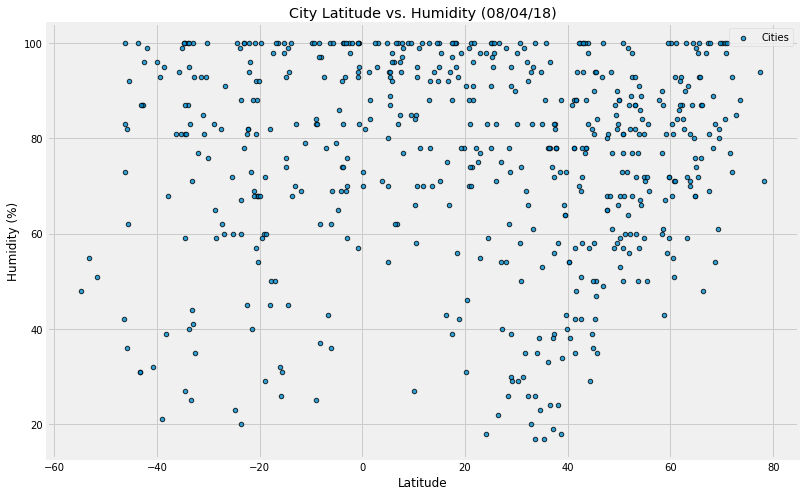

In [8]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Humidity",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

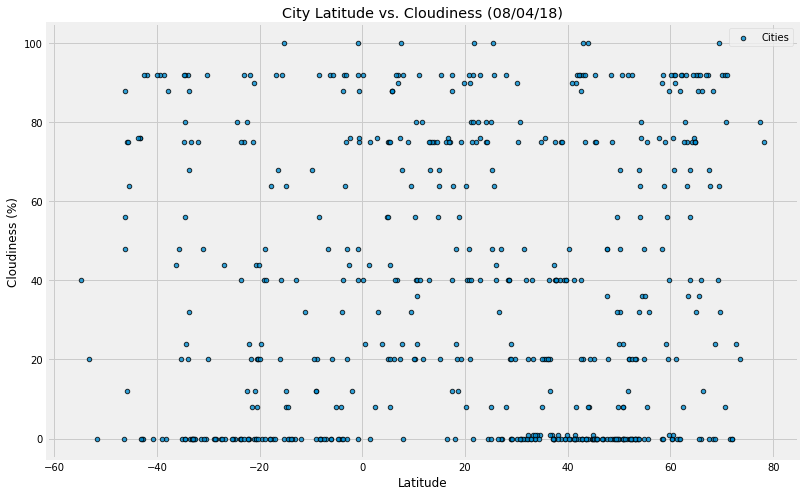

In [9]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Cloudiness",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

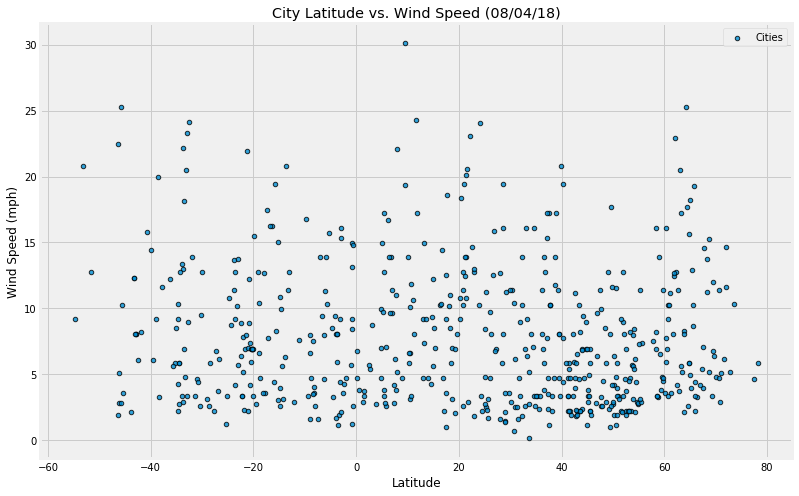

In [10]:
# Build the scatter plots for each city types
city_data_pd.plot(kind="scatter",
                  x="Lat", y="Wind Speed",
                  figsize=(12, 8),
                  alpha=0.8,
                  edgecolor="black",
                  marker="o",
                  linewidths=1,
                  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()